# 📚 Theory: Canny Edge Detection

Canny Edge Detection is a popular multi-stage algorithm developed by **John F. Canny**. It is widely used for detecting edges in images.

The process involves the following stages:

---

## 1️⃣ Noise Reduction

- Edge detection is **sensitive to noise**, so the first step is **smoothing the image**.
- Apply a **5x5 Gaussian filter** to reduce noise.
- This was covered in earlier chapters.

---

## 2️⃣ Finding Intensity Gradient of the Image

- Apply **Sobel filters** in both **horizontal (x)** and **vertical (y)** directions to get first derivatives:
  - $ G_x $: horizontal derivative
  - $ G_y $: vertical derivative

  
- Compute the **edge gradient magnitude** and **direction**:

$$
  \text{Gradient Magnitude: } G = \sqrt{G_x^2 + G_y^2}
$$

$$
  \text{Gradient Direction: } \theta = \tan^{-1}\left(\frac{G_y}{G_x}\right)
$$


- Gradient direction is always **perpendicular to edges** and is rounded to one of four angles:
  - Vertical
  - Horizontal
  - Diagonal (positive slope)
  - Diagonal (negative slope)
---


## 3️⃣ Non-Maximum Suppression

- Goal: **Thin out** the edges.
- For each pixel:
  - Check if it is a **local maximum** in its gradient direction.
  - If yes → keep it.
  - If no → suppress (set to 0).

### 🔍 Example:
If point A is on a vertical edge:
- Check the intensity of points B and C in the **gradient direction**.
- If A > B and A > C → retain it.
- Else → suppress it.

➡️ **Result:** A binary image with **thin edges**.

---

## 4️⃣ Hysteresis Thresholding

This step **decides which detected edges are real**.

- Requires two threshold values:
  - `minVal`: lower threshold
  - `maxVal`: upper threshold

### Rules:
- Pixels with gradient **> maxVal** → **sure-edge**
- Pixels with gradient **< minVal** → **discarded**
- Pixels **between minVal and maxVal**:
  - If **connected** to sure-edge → keep
  - Else → discard

### 🔍 Example:
- Edge A: above `maxVal` → keep
- Edge C: below `maxVal`, **connected to A** → keep
- Edge B: not connected to any strong edge → discard

➡️ This stage also removes **small noise** based on the assumption that **real edges are long and connected**.

---

## ✅ Final Result

After all these steps, we get a clean binary image showing **strong edges** only.

---


# ⚙️ Canny Edge Detection in OpenCV

OpenCV provides a ready-made function:

```python
cv.Canny(image, minVal, maxVal[, apertureSize[, L2gradient]])

### 📌 Parameters of `cv.Canny()`

- **`image`**: Input grayscale image.

- **`minVal`**: Lower threshold for edge detection.

- **`maxVal`**: Upper threshold for edge detection.

- **`apertureSize`** *(optional)*: Size of Sobel kernel.  
  - Default value: `3`

- **`L2gradient`** *(optional)*:  
  - If `True`: Uses the accurate gradient magnitude formula:  
    $$
    \sqrt{G_x^2 + G_y^2}
    $$
  - If `False`: Uses the approximation:  
    $$
    |G_x| + |G_y|
    $$
  - Default value: `False`


# 🧪 Example Code

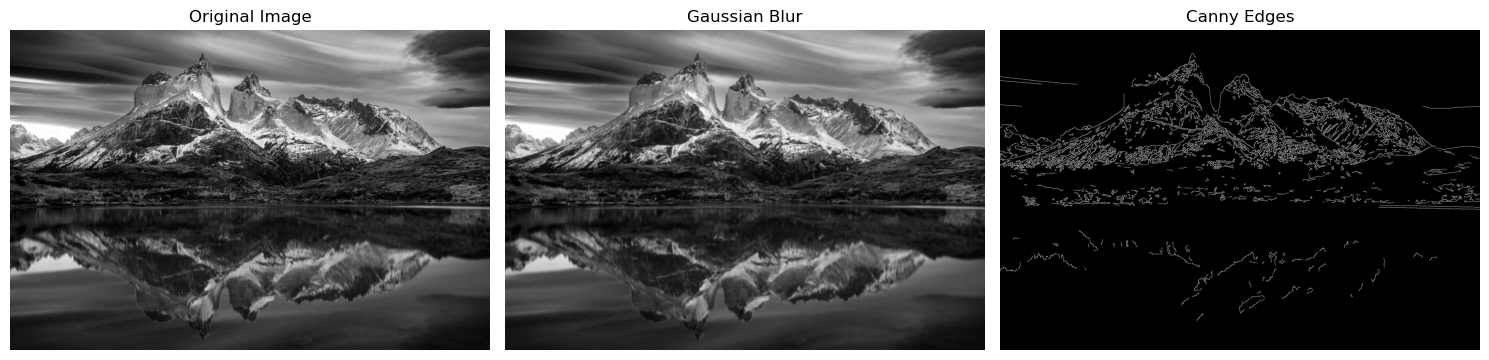

In [3]:
# Import Libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load Image in Grayscale
img = cv.imread('Image/high_res_image.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Image not found or unable to load."

# Gaussian Blur to Reduce Noise
blurred = cv.GaussianBlur(img, (5, 5), 0)
# Apply Canny Edge Detection
edges = cv.Canny(blurred, 100, 200)

# Plot all three images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.tight_layout()
plt.show()